## 서울시기준, 자치구별 CCTV, 인구 현황 분석

- 개별 데이터 분석
- 상관성 분석
- pandas 사용법 습득, 시각화 기초


### 1. 데이터 수집(획득) 및 로드

In [1]:
import numpy as np
import pandas as pd

- pandas에서 엑셀(csv) 파일로드
- 데이터를 부분 확인 후 데이터 이상여부 간단히 시각적 확인

In [2]:
s_cctv = pd.read_excel('../data/seoul_cctv_state.xlsx', encoding='utf-8')

In [3]:
# 전체 확인 
s_cctv

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671
5,광 진 구,1581,470.0,42.0,83.0,87,64,21,468,346
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486
7,금 천 구,1634,27.0,17.0,242.0,101,382,136,199,530
8,노 원 구,1906,481.0,117.0,203.0,80,461,298,110,156
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71


In [4]:
# 상위값 확인
s_cctv.head()  # 5개가 확인됨
s_cctv.head(2) # 2개 

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385


In [5]:
# 하위값 확인
s_cctv.tail()   # 5개
s_cctv.tail(2)  # 2개

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
23,중 구,1544,25.0,165.0,114.0,80,245,270,317,328
24,중 랑 구,1068,NaN,NaN,NaN,770,102,121,66,9


- 대략적으로 탐색한 결과 동대문구와 중량구에 결측치(NaN) 확인 

In [6]:
# 탐색 
# 컬러명 확인
s_cctv.columns

Index(['기관명', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년'],
      dtype='object')

In [7]:
# '2011년 이전' 이라는 컬러명 획득
s_cctv.columns[2]

'2011년 이전'

In [8]:
# 데이터의 차원, 모습 확인 => shape
s_cctv.shape

(25, 10)

In [9]:
# 인덱스 
s_cctv.index

RangeIndex(start=0, stop=25, step=1)

In [10]:
s_cctv.index[1]

1

In [11]:
s_cctv.head(2)

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385


In [12]:
# 기관명 => 자치구 명칭을 통일 => DataFrame의 컬럼명 변경 (의미의 명확성 부여)
# inplace => 파라미터는 원본을 변경할 것인가? True면 원본변경(반영)
# s_cctv.rename(columns={ key:value}, inplace=True )
# key: 이전 컬럼명 , 값: 신규컬럼명
s_cctv.rename(columns={ s_cctv.columns[0]:'자치구'}, inplace=True )

In [13]:
s_cctv.head(1)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448


#### 실습 
- s_pop이라는 변수명으로 report.csv를 데이터를 로드하시오.
- 데이터가 잘 오픈되지 않아서 일단 Report.xls로 다시 받아서 동일하게 처리 진행

In [14]:
s_pop = pd.read_excel('../data/Report.xls', encoding= 'utf-8')
s_pop

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,인구밀도,인구밀도.1,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,인구밀도,인구밀도,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,인구밀도(명/㎢),면적(㎢),세대당인구,65세이상고령자
2,2011,합계,4192752,10528774,5208492,5320282,10249679,5073899,5175780,279095,134593,144502,17397,605,2,1049425
3,2011,종로구,76688,177419,88107,89312,168382,83931,84451,9037,4176,4861,7421,24,2,22939
4,2011,중구,61475,141567,71137,70430,133193,67065,66128,8374,4072,4302,14212,10,2,18099
5,2011,용산구,112617,259288,126735,132553,246501,120183,126318,12787,6552,6235,11857,22,2,31837
6,2011,성동구,126148,308767,154511,154256,300711,150655,150056,8056,3856,4200,18325,17,2,32767
7,2011,광진구,158472,386673,190867,195806,371936,184103,187833,14737,6764,7973,22661,17,2,33613
8,2011,동대문구,157823,378534,189538,188996,365486,183925,181561,13048,5613,7435,26653,14,2,44368
9,2011,중랑구,175115,428672,214258,214414,423706,212291,211415,4966,1967,2999,23175,18,2,43745


In [15]:
# 데이터를 들여다 보니 컬럼쪽이 2개가 더 많이 나타났다. 헤더를 2번으로 지정하여 갯 수를 줄이겟다.
# 필요 없는 데이터는 로드 단계에서 걷어내겠다 -> 사전에 데이터를 보고 판단
s_pop = pd.read_excel('../data/Report.xls', encoding= 'utf-8', header=2,
                     usecols = 'A,B,D,G,J,P')
s_pop.head(2)

,기간,자치구,계,계.1,계.2,65세이상고령자
0,2011,합계,10528774,10249679,279095,1049425
1,2011,종로구,177419,168382,9037,22939


In [16]:
# 컬럼명을 의미있게 조정
# 계 ~ ..고령자 => 인구수, 한국인, 외국인, 고령자
dic = {
    s_pop.columns[2] :'인구수',
    s_pop.columns[3] : '한국인',
    s_pop.columns[4] : '외국인',
    s_pop.columns[5] : '고령자'
        
}
s_pop.rename(columns=dic, inplace=True)
s_pop.head(2)

,기간,자치구,인구수,한국인,외국인,고령자
0,2011,합계,10528774,10249679,279095,1049425
1,2011,종로구,177419,168382,9037,22939


## pandas 기초 학습

<a href ='http://localhost:8888/notebooks/Desktop/py_projects/analysis/pandas/basic/pandas%EA%B8%B0%EC%B4%88.ipynb'>이동하기</a>

## 데이터 

In [17]:
s_cctv.head(2)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385


In [18]:
# 소계 컬럼을 중심으로 오름차순 정렬
s_cctv.sort_values( by='소계', ascending= True).head(4)   # head를 붙여 위에서 붙어 4개

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71
24,중 랑 구,1068,NaN,NaN,NaN,770,102,121,66,9
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
22,종 로 구,1471,8.0,7.0,599.0,132,195,148,281,101


In [19]:
s_cctv.sort_values( by='소계', ascending= True).tail(4)    # tail을 붙임으로서 뒤에서 4번째부터 순 차례대로 출력

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
16,성 북 구,3003,779.0,84.0,304.0,241,279,388,285,643
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448


# 문제) 최신증가율 구하기

- 강남구, 구로구 지역은 상업지구가 많아서, 관악구나 성북구는 산을 타고 빌라촌이 많다.
- 이런 지역에는 인구 밀도가 비교적 높아서(예상) 혹은 유동인구가 많아서 CCTV가 많지 않나 예상이 된다.
- 도봉구, 중량구, 강북구 등은 주거지가 많아서 적어 보이고, 종로구는 보류
- 2011년도 이전 대비,향후 7년간 증가율 계산
- 7년 간 증가율 = (2012~2018: 합산)/2011년 * 100

In [20]:
s_cctv['최신증가율'] = ((s_cctv.loc[ '0':,'소계' ]-s_cctv.loc['0':,'2011년 이전'])/s_cctv.loc['0':,'2011년 이전'])*100
s_cctv.head(2)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최신증가율
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448,168.569959
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385,520.132013


In [21]:
((s_cctv.loc[ '0':,'소계' ]-s_cctv.loc['0':,'2011년 이전'])/s_cctv.loc['0':,'2011년 이전'])*100

0       168.569959
1       520.132013
2       420.576132
3       638.356164
4       826.744186
5       236.382979
6       278.755869
7      5951.851852
8       296.257796
9       335.532995
10             NaN
11      647.899160
12      230.769231
13      275.398230
14      141.894198
15      302.857143
16      285.494223
17      164.333333
18      259.455959
19     1790.151515
20       61.297889
21      116.996337
22    18287.500000
23     6076.000000
24             NaN
dtype: float64

In [22]:
# s_cctv.drop(['7년간증가율'],inplace= True,axis=1)

In [23]:
s_cctv

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최신증가율
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448,168.569959
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385,520.132013
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319,420.576132
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254,638.356164
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671,826.744186
5,광 진 구,1581,470.0,42.0,83.0,87,64,21,468,346,236.382979
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486,278.755869
7,금 천 구,1634,27.0,17.0,242.0,101,382,136,199,530,5951.851852
8,노 원 구,1906,481.0,117.0,203.0,80,461,298,110,156,296.257796
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71,335.532995


In [24]:
# 1) 단순히하기
tmp_sum = s_cctv['2012년']+s_cctv['2013년']+s_cctv['2014년']+s_cctv['2015년']+s_cctv['2016년']+s_cctv['2017년']+s_cctv['2018년']
tmp_sum

0     3277.0
1     1576.0
2     1022.0
3     1398.0
4     3555.0
5     1111.0
6     2375.0
7     1607.0
8     1425.0
9      661.0
10       NaN
11    1542.0
12    1350.0
13    1556.0
14    1663.0
15    2014.0
16    2224.0
17     986.0
18    2003.0
19    2363.0
20     784.0
21    1597.0
22    1463.0
23    1519.0
24       NaN
dtype: float64

In [25]:
tmp_sum / s_cctv['2011년 이전'] * 100

0       168.569959
1       520.132013
2       420.576132
3       638.356164
4       826.744186
5       236.382979
6       278.755869
7      5951.851852
8       296.257796
9       335.532995
10             NaN
11      647.899160
12      230.769231
13      275.398230
14      141.894198
15      302.857143
16      285.494223
17      164.333333
18      259.455959
19     1790.151515
20       61.297889
21      116.996337
22    18287.500000
23     6076.000000
24             NaN
dtype: float64

In [26]:
s_cctv.sort_values('최신증가율')

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최신증가율
20,용 산 구,2063,1279.0,152.0,201.0,107,102,89,60,73,61.297889
21,은 평 구,2962,1365.0,83.0,99.0,343,180,296,229,367,116.996337
14,서 초 구,2835,1172.0,91.0,228.0,134,215,352,247,396,141.894198
17,송 파 구,1586,600.0,99.0,88.0,21,166,100,116,396,164.333333
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448,168.569959
12,마 포 구,1935,585.0,108.0,69.0,70,177,359,372,195,230.769231
5,광 진 구,1581,470.0,42.0,83.0,87,64,21,468,346,236.382979
18,양 천 구,2775,772.0,161.0,185.0,169,172,349,137,830,259.455959
13,서대문구,2121,565.0,233.0,214.0,114,109,277,415,194,275.398230
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486,278.755869


- 결측치(Nan)가 이미 존재했던 중량구, 동대문구에 대한 조치 필요
> 결측치를 0으로 처리하는방안  
> 최초 데이터가 존재하는 년도까지 기준점으로 잡고 가는 방향  
> 최초 데이터에 대한 의구심을 가지고 다시 데이터를 수집 하는 방향

- 종로구는 초기 데이터가 워낙 작아서 증가율이 너무 크게 나온다.
> 특정 구간까지는 -년도 이전으로 묶어주는 것이 나을 듯 하다.  

- 공공데이터 자료 검토 결과 2018년도와 2019년도 자료가 상이하다.
- Nan 처리 -> 0으로 진행
- 원래는 자료 제공기관에 문의하여 확인과정이 필요하나, 절차상 생략하고 2019년도 자료에서 2011이전~2012,2013,2014까지를 합산하여 새로운 컬럼 2014년도 이전을 생성
- 필요없는 자료는 제거
- 2014년도 이전 자료 대비 2015~2018 최신증가율*(4년간)이라는 항목으로 추가

In [27]:
#원래는 자료 제공기관에 문의하여 확인과정이 필요하나, 절차상 생략하고 2019년도 자료에서 2011이전~2012,2013,2014까지를 합산하여 새로운 컬럼 2014년도 이전을 생성
s_cctv['2014년 이전'] = s_cctv['2011년 이전'] + s_cctv['2012년'] + s_cctv['2013년'] + s_cctv['2014년']


In [28]:
s_cctv

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최신증가율,2014년 이전
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448,168.569959,2885.0
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385,520.132013,883.0
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319,420.576132,546.0
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254,638.356164,722.0
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671,826.744186,1392.0
5,광 진 구,1581,470.0,42.0,83.0,87,64,21,468,346,236.382979,682.0
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486,278.755869,1607.0
7,금 천 구,1634,27.0,17.0,242.0,101,382,136,199,530,5951.851852,387.0
8,노 원 구,1906,481.0,117.0,203.0,80,461,298,110,156,296.257796,881.0
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71,335.532995,456.0


###  nan 처리 => 결측치 처리
- 결측값 채우기
 > 1. 특정값
 > 2. 앞방향으로 채우기 -> 시계열에서활용
 > 3. 뒷방향으로 채우기 -> 시계열에서활용
 > 4. 채우는 횟수 제한

- 결측값 대체하기
 > 변수별 평균으로 대체

- 결측값 처리
 > 다른 변수의 값으로 대체
 
- 결측값 제거
 > 아래 코드 참조(isnull 검사후 => 블리언인덱싱이용 => 원데이터에 대상 index를 획득)  
 > any()로 검사 후 참이면 해당 인덱스에 일치되는 데이터를 제거( 여기선 if문으로 돌려 없앰)  

In [29]:
s_cctv.fillna(0)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최신증가율,2014년 이전
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448,168.569959,2885.0
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385,520.132013,883.0
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319,420.576132,546.0
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254,638.356164,722.0
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671,826.744186,1392.0
5,광 진 구,1581,470.0,42.0,83.0,87,64,21,468,346,236.382979,682.0
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486,278.755869,1607.0
7,금 천 구,1634,27.0,17.0,242.0,101,382,136,199,530,5951.851852,387.0
8,노 원 구,1906,481.0,117.0,203.0,80,461,298,110,156,296.257796,881.0
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71,335.532995,456.0


In [30]:
((s_cctv['소계']-s_cctv['2014년 이전'])/s_cctv['2014년 이전'])*100

0      80.970537
1     112.797282
2     131.684982
3     123.961219
4     186.278736
5     131.818182
6     100.808961
7     322.222222
8     116.345062
9      88.157895
10           NaN
11    106.257242
12    132.572115
13     88.365897
14     74.461538
15    169.788520
16    113.281250
17     96.287129
18    115.617716
19    269.082840
20     18.631397
21     56.719577
22     97.184987
23    302.083333
24           NaN
dtype: float64

In [31]:
try:
    # 제거
    s_cctv.drop(['최신증가율'],inplace= True,axis=1)
    print( s_cctv.head(2))
except Exception as e:
    pass

     자치구    소계  2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년  \
0  강 남 구  5221    1944.0  195.0  316.0    430    546    765    577    448   
1  강 동 구  1879     303.0  387.0  134.0     59    144    194    273    385   

   2014년 이전  
0    2885.0  
1     883.0  


In [32]:
s_cctv['최신증가율'] = ((s_cctv['소계']-s_cctv['2014년 이전'])/s_cctv['2014년 이전'])*100
s_cctv.fillna(0)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2014년 이전,최신증가율
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448,2885.0,80.970537
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385,883.0,112.797282
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319,546.0,131.684982
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254,722.0,123.961219
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671,1392.0,186.278736
5,광 진 구,1581,470.0,42.0,83.0,87,64,21,468,346,682.0,131.818182
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486,1607.0,100.808961
7,금 천 구,1634,27.0,17.0,242.0,101,382,136,199,530,387.0,322.222222
8,노 원 구,1906,481.0,117.0,203.0,80,461,298,110,156,881.0,116.345062
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71,456.0,88.157895


In [33]:
s_cctv

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2014년 이전,최신증가율
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448,2885.0,80.970537
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385,883.0,112.797282
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319,546.0,131.684982
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254,722.0,123.961219
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671,1392.0,186.278736
5,광 진 구,1581,470.0,42.0,83.0,87,64,21,468,346,682.0,131.818182
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486,1607.0,100.808961
7,금 천 구,1634,27.0,17.0,242.0,101,382,136,199,530,387.0,322.222222
8,노 원 구,1906,481.0,117.0,203.0,80,461,298,110,156,881.0,116.345062
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71,456.0,88.157895


### 강사님 방법

In [34]:
# 2011sus~2014년 추출

# 1)
tmp = s_cctv.iloc[:,[2,3,4,5]]
tmp

#) 2) 같은 방법
# s_cctv['2011년 이전'] + s_cctv['2012년 이전'] + s_cctv['203\1년']+... +s_cctv['2014년']

,2011년 이전,2012년,2013년,2014년
0,1944.0,195.0,316.0,430
1,303.0,387.0,134.0,59
2,243.0,88.0,141.0,74
3,219.0,155.0,118.0,230
4,430.0,56.0,419.0,487
5,470.0,42.0,83.0,87
6,852.0,219.0,349.0,187
7,27.0,17.0,242.0,101
8,481.0,117.0,203.0,80
9,197.0,66.0,8.0,185


In [35]:
tmp.sum(axis=1)

0     2885.0
1      883.0
2      546.0
3      722.0
4     1392.0
5      682.0
6     1607.0
7      387.0
8      881.0
9      456.0
10    1326.0
11     863.0
12     832.0
13    1126.0
14    1625.0
15     993.0
16    1408.0
17     808.0
18    1287.0
19     676.0
20    1739.0
21    1890.0
22     746.0
23     384.0
24     770.0
dtype: float64

In [36]:
s_cctv.sort_values('최신증가율')

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2014년 이전,최신증가율
20,용 산 구,2063,1279.0,152.0,201.0,107,102,89,60,73,1739.0,18.631397
21,은 평 구,2962,1365.0,83.0,99.0,343,180,296,229,367,1890.0,56.719577
14,서 초 구,2835,1172.0,91.0,228.0,134,215,352,247,396,1625.0,74.461538
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448,2885.0,80.970537
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71,456.0,88.157895
13,서대문구,2121,565.0,233.0,214.0,114,109,277,415,194,1126.0,88.365897
17,송 파 구,1586,600.0,99.0,88.0,21,166,100,116,396,808.0,96.287129
22,종 로 구,1471,8.0,7.0,599.0,132,195,148,281,101,746.0,97.184987
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486,1607.0,100.808961
11,동 작 구,1780,238.0,93.0,29.0,503,130,254,278,255,863.0,106.257242


In [37]:
rm_cols = s_cctv.columns[2:6]

In [38]:
rm_cols

Index(['2011년 이전', '2012년', '2013년', '2014년'], dtype='object')

In [39]:
s_cctv.fillna(0)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2014년 이전,최신증가율
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448,2885.0,80.970537
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385,883.0,112.797282
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319,546.0,131.684982
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254,722.0,123.961219
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671,1392.0,186.278736
5,광 진 구,1581,470.0,42.0,83.0,87,64,21,468,346,682.0,131.818182
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486,1607.0,100.808961
7,금 천 구,1634,27.0,17.0,242.0,101,382,136,199,530,387.0,322.222222
8,노 원 구,1906,481.0,117.0,203.0,80,461,298,110,156,881.0,116.345062
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71,456.0,88.157895


In [40]:
s_cctv = s_cctv.fillna(0)

In [41]:
s_cctv.head(2)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2014년 이전,최신증가율
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448,2885.0,80.970537
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385,883.0,112.797282


In [42]:
# #강사님 방식
# # 최신증가율을 다시 계산해서 세팅
# tmp = s_cctv.iloc[ :, [2,3,4,5]  ].sum(axis=1)
# s_cctv[ '최신증가율' ] = tmp / s_cctv[ '2014년도 이전' ] * 100
# # 펜시 인덱싱을 통함 컬럼 재배치 후 사본 리턴
# s_cctv = s_cctv.iloc[ :, [0,1,7,2,3,4,5,6] ]
# s_cctv

## 인구 현황 분석

In [43]:
s_pop

,기간,자치구,인구수,한국인,외국인,고령자
0,2011,합계,10528774,10249679,279095,1049425
1,2011,종로구,177419,168382,9037,22939
2,2011,중구,141567,133193,8374,18099
3,2011,용산구,259288,246501,12787,31837
4,2011,성동구,308767,300711,8056,32767
5,2011,광진구,386673,371936,14737,33613
6,2011,동대문구,378534,365486,13048,44368
7,2011,중랑구,428672,423706,4966,43745
8,2011,성북구,494422,485171,9251,55213
9,2011,강북구,348740,345054,3686,43507


In [44]:
# s_pop에서 기간이 2014~2018년도 까지만 추출해라

In [45]:
    # 내가한거
s_pop.iloc[78:,:]

,기간,자치구,인구수,한국인,외국인,고령자
78,2014,합계,10369593,10103233,266360,1221616
79,2014,종로구,165344,156993,8351,24537
80,2014,중구,136227,128065,8162,19960
81,2014,용산구,249914,235951,13963,34896
82,2014,성동구,303891,296086,7805,36684
83,2014,광진구,377375,363354,14021,38974
84,2014,동대문구,376319,363687,12632,50915
85,2014,중랑구,423411,418836,4575,51995
86,2014,성북구,475961,466706,9255,62066
87,2014,강북구,338410,335025,3385,50841


In [46]:
s_pop.dtypes

기간      int64
자치구    object
인구수     int64
한국인     int64
외국인     int64
고령자     int64
dtype: object

In [47]:
    # 강사님
s_pop[ s_pop.기간 >= 2014 ]


,기간,자치구,인구수,한국인,외국인,고령자
78,2014,합계,10369593,10103233,266360,1221616
79,2014,종로구,165344,156993,8351,24537
80,2014,중구,136227,128065,8162,19960
81,2014,용산구,249914,235951,13963,34896
82,2014,성동구,303891,296086,7805,36684
83,2014,광진구,377375,363354,14021,38974
84,2014,동대문구,376319,363687,12632,50915
85,2014,중랑구,423411,418836,4575,51995
86,2014,성북구,475961,466706,9255,62066
87,2014,강북구,338410,335025,3385,50841


In [48]:
s_pop_last = s_pop[ s_pop.기간 >= 2014 ]
s_pop_last

,기간,자치구,인구수,한국인,외국인,고령자
78,2014,합계,10369593,10103233,266360,1221616
79,2014,종로구,165344,156993,8351,24537
80,2014,중구,136227,128065,8162,19960
81,2014,용산구,249914,235951,13963,34896
82,2014,성동구,303891,296086,7805,36684
83,2014,광진구,377375,363354,14021,38974
84,2014,동대문구,376319,363687,12632,50915
85,2014,중랑구,423411,418836,4575,51995
86,2014,성북구,475961,466706,9255,62066
87,2014,강북구,338410,335025,3385,50841


In [49]:
s_pop_last.shape

(130, 6)

In [50]:
s_cctv.shape

(25, 12)

In [51]:
# 자치구 개수로 인구데이터 개수를 나눠부니 딱 안떨어진다. => 125가 되어야하는데
# 130이 되엇다 => 년도별로 1개식 데이터가 더 있다.
s_pop_last.shape[0] / s_cctv.shape[0]

5.2

In [52]:
s_pop_last.head(27)
# 찍어보니 합계라는 데이터가 추가되어 있다.
# 합계를 제거 혹은 합계를 빼고 데이터 프레임을 구성해라

,기간,자치구,인구수,한국인,외국인,고령자
78,2014,합계,10369593,10103233,266360,1221616
79,2014,종로구,165344,156993,8351,24537
80,2014,중구,136227,128065,8162,19960
81,2014,용산구,249914,235951,13963,34896
82,2014,성동구,303891,296086,7805,36684
83,2014,광진구,377375,363354,14021,38974
84,2014,동대문구,376319,363687,12632,50915
85,2014,중랑구,423411,418836,4575,51995
86,2014,성북구,475961,466706,9255,62066
87,2014,강북구,338410,335025,3385,50841


In [53]:
s_pop_last = s_pop_last[s_pop_last.자치구 !='합계']
s_pop_last.shape

(125, 6)

In [54]:
s_pop_last.shape[0] / s_cctv.shape[0]
# 데이터 매칭 정상

5.0

In [55]:
# 데이터 프레임을 합쳐서 진행할 것인데, 자치구 데이터들이 고유한지 체크
s_cctv['자치구']
s_cctv['자치구'].unique()
len(s_cctv['자치구'].unique())

25

In [56]:
len(s_pop_last['자치구'].unique())

25

In [57]:
# NaN 검출
s_cctv['자치구'].isnull().head()

0    False
1    False
2    False
3    False
4    False
Name: 자치구, dtype: bool

In [58]:
# Nan 데이터 제거
nanidx = s_cctv[ s_cctv['자치구'].isnull()].index
nanidx.any() #any 는 존재하는지 확인 즉, 여기선 null값이 있는지 
if nanidx.any():
    s_cctv.drop([nanidx], inplace=True)

In [59]:
# 인구 데이터 s_pop_last 에서 외국인비율, 고령자비율 추가
# 외국인비율 = 외국인 / 인구수 * 100

In [60]:
s_pop_last.columns

Index(['기간', '자치구', '인구수', '한국인', '외국인', '고령자'], dtype='object')

In [61]:
s_pop_last['외국인비율'] = s_pop_last['외국인'] / s_pop_last['인구수'] * 100
s_pop_last['고령자비율'] = s_pop_last['고령자'] / s_pop_last['인구수'] * 100

C:\Users\User\Anaconda3\envs\analysis\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\envs\analysis\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [62]:
# s_pop_last 데이터에서 s_pop_last_2018 생성, 2018년도만 획득
s_pop_last_2018 = s_pop_last[ s_pop_last.기간 == 2018]
s_pop_last_2018.shape

(25, 8)

In [63]:
s_pop_last_2018.sort_values( by='외국인비율', ascending= False).head(2)

,기간,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
201,2018,영등포구,403600,367778,35822,55673,8.875619,13.794103
200,2018,금천구,254021,233917,20104,35739,7.914306,14.069309


In [64]:
s_cctv.head(3)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2014년 이전,최신증가율
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448,2885.0,80.970537
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385,883.0,112.797282
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319,546.0,131.684982


### DataFrame 합치기 : 병합 ( 고급주제)

<a href ='http://localhost:8888/notebooks/Desktop/py_projects/analysis/pandas/basic/pandas_advanced.ipynb'>실습하기</a>

In [65]:
# s_cctv, s_pop_last_2018 2개를 병합
# data_result = pd.merge(s_cctv, s_pop_last_2018, on='자치구')
# data_result.shape

In [66]:
s_cctv['자치구']

0       강 남 구
1       강 동 구
2       강 북 구
3       강 서 구
4       관 악 구
5       광 진 구
6       구 로 구
7       금 천 구
8       노 원 구
9       도 봉 구
10       동대문구
11      동 작 구
12      마 포 구
13       서대문구
14      서 초 구
15      성 동 구
16      성 북 구
17      송 파 구
18      양 천 구
19       영등포구
20      용 산 구
21      은 평 구
22      종 로 구
23    중     구
24      중 랑 구
Name: 자치구, dtype: object

In [67]:
s_pop_last_2018['자치구']

183     종로구
184      중구
185     용산구
186     성동구
187     광진구
188    동대문구
189     중랑구
190     성북구
191     강북구
192     도봉구
193     노원구
194     은평구
195    서대문구
196     마포구
197     양천구
198     강서구
199     구로구
200     금천구
201    영등포구
202     동작구
203     관악구
204     서초구
205     강남구
206     송파구
207     강동구
Name: 자치구, dtype: object

In [68]:
# s_pop_last_2018과 s_cctv의 자치구 용어가 통일이 되어있지 않아 문자열 내부에 공백이 존재한다.
# 공백을 부여할 것인지, 공백을 제거할 것인지 기준점을 정해 데이터를 전처리 후 병합진행
 ' 용 산 구 '.replace(' ','')

'용산구'

In [69]:
# s_cctv의 자치구 데이터를 한놈씩 꺼내서 공백을 제거하고 원위치 시켜야 된다.
# 한놈씩 건들여 적용시키는 함수 apply
def reSpace(x):
    return x.replace(' ','')

# 처리할 내용이 1줄이면 lambda로 처리, 그 이상이면 함수를 정의해서 처리한다.

# s_cctv['자치구'].apply ( lambda xL x.replace(' ',''))
s_cctv['자치구'] = s_cctv['자치구'].apply( lambda x: x.replace(' ','') )

In [70]:
data_result = pd.merge( s_cctv, s_pop_last_2018, on='자치구' )
data_result

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2014년 이전,최신증가율,기간,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,2885.0,80.970537,2018,547453,542364,5089,67085,0.929578,12.254020
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,883.0,112.797282,2018,431920,427573,4347,58770,1.006436,13.606686
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,546.0,131.684982,2018,322915,319164,3751,58196,1.161606,18.022080
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,722.0,123.961219,2018,603611,596949,6662,79660,1.103691,13.197241
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,1392.0,186.278736,2018,520040,501957,18083,72249,3.477233,13.892970
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346,682.0,131.818182,2018,371063,355559,15504,45619,4.178266,12.294139
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486,1607.0,100.808961,2018,438486,404497,33989,61801,7.751445,14.094179
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530,387.0,322.222222,2018,254021,233917,20104,35739,7.914306,14.069309
8,노원구,1906,481.0,117.0,203.0,80,461,298,110,156,881.0,116.345062,2018,548160,543752,4408,77096,0.804145,14.064507
9,도봉구,858,197.0,66.0,8.0,185,59,155,117,71,456.0,88.157895,2018,341649,339413,2236,55964,0.654473,16.380554


In [71]:
# 기간 제거   -> 간단히 제거
del data_result['기간']

In [72]:
del data_result['2011년 이전']

In [73]:
data_result

,자치구,소계,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2014년 이전,최신증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,195.0,316.0,430,546,765,577,448,2885.0,80.970537,547453,542364,5089,67085,0.929578,12.254020
1,강동구,1879,387.0,134.0,59,144,194,273,385,883.0,112.797282,431920,427573,4347,58770,1.006436,13.606686
2,강북구,1265,88.0,141.0,74,145,254,1,319,546.0,131.684982,322915,319164,3751,58196,1.161606,18.022080
3,강서구,1617,155.0,118.0,230,187,190,264,254,722.0,123.961219,603611,596949,6662,79660,1.103691,13.197241
4,관악구,3985,56.0,419.0,487,609,619,694,671,1392.0,186.278736,520040,501957,18083,72249,3.477233,13.892970
5,광진구,1581,42.0,83.0,87,64,21,468,346,682.0,131.818182,371063,355559,15504,45619,4.178266,12.294139
6,구로구,3227,219.0,349.0,187,268,326,540,486,1607.0,100.808961,438486,404497,33989,61801,7.751445,14.094179
7,금천구,1634,17.0,242.0,101,382,136,199,530,387.0,322.222222,254021,233917,20104,35739,7.914306,14.069309
8,노원구,1906,117.0,203.0,80,461,298,110,156,881.0,116.345062,548160,543752,4408,77096,0.804145,14.064507
9,도봉구,858,66.0,8.0,185,59,155,117,71,456.0,88.157895,341649,339413,2236,55964,0.654473,16.380554


In [74]:
# 자차구 -> 인덱스로 적용 => 시각화를 위해 배치
# 특정 컬럼을 인덱스로 적용
data_result.set_index('자치구', inplace=True)
data_result.head()

,소계,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2014년 이전,최신증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,,,,,,,,,
강남구,5221,195.0,316.0,430,546,765,577,448,2885.0,80.970537,547453,542364,5089,67085,0.929578,12.254020
강동구,1879,387.0,134.0,59,144,194,273,385,883.0,112.797282,431920,427573,4347,58770,1.006436,13.606686
강북구,1265,88.0,141.0,74,145,254,1,319,546.0,131.684982,322915,319164,3751,58196,1.161606,18.022080
강서구,1617,155.0,118.0,230,187,190,264,254,722.0,123.961219,603611,596949,6662,79660,1.103691,13.197241
관악구,3985,56.0,419.0,487,609,619,694,671,1392.0,186.278736,520040,501957,18083,72249,3.477233,13.892970


### 상관성 검사
- 상관계수 : 0~1
> 0.1 이하 : 거의 관련 없음, 무시  
> 0.3 이하 : 약한 상관관계  
> 0.7 이하 : 뚜렷한 상관관계  
> ~이상 : 명확한 상관관계  
-np.corrcoef()

In [75]:
# CCTV 설치 총양 대비 고령자 비율
np.corrcoef(data_result['고령자비율'], data_result['소계'])
# 행렬로 응답, 대각선 기준 값이 출력

array([[ 1.        , -0.40379375],
       [-0.40379375,  1.        ]])

In [76]:
# -0.40379375 => 관련없음

In [77]:
np.corrcoef(data_result['인구수'], data_result['소계'])
# 0.37523207 약한쪽에 가까움

array([[1.        , 0.37523207],
       [0.37523207, 1.        ]])

In [78]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.04143132],
       [-0.04143132,  1.        ]])

In [79]:
np.corrcoef(data_result['한국인'],data_result['소계'])

array([[1.       , 0.3580254],
       [0.3580254, 1.       ]])

In [80]:
# CCTV가 많은 구 시각화를 한다 => 데이터 정렬
data_result.sort_values(by='소계', ascending=False).head(5)

,소계,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2014년 이전,최신증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,,,,,,,,,
강남구,5221,195.0,316.0,430,546,765,577,448,2885.0,80.970537,547453,542364,5089,67085,0.929578,12.254020
관악구,3985,56.0,419.0,487,609,619,694,671,1392.0,186.278736,520040,501957,18083,72249,3.477233,13.892970
구로구,3227,219.0,349.0,187,268,326,540,486,1607.0,100.808961,438486,404497,33989,61801,7.751445,14.094179
성북구,3003,84.0,304.0,241,279,388,285,643,1408.0,113.281250,447687,435868,11819,67782,2.640014,15.140489
은평구,2962,83.0,99.0,343,180,296,229,367,1890.0,56.719577,487666,483197,4469,77420,0.916406,15.875620


----------------------------------------------------------------------------------------------------------------------------------------

## 시각화 기초

<a href='http://localhost:8888/notebooks/Desktop/py_projects/analysis/pandas/basic/%EC%8B%9C%EA%B0%81%ED%99%94.ipynb'>시각화</a>
<br>
<a href='http://localhost:8888/notebooks/Desktop/py_projects/analysis/pandas/basic/matplotlib_%EC%8B%9C%EA%B0%81%ED%99%94%EA%B8%B0%EC%B4%88.ipynb'>matplotlib_시각화기초</a>

In [81]:
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

In [82]:
# # 폰트
# import platform 
# from matplotlib import font_manager, rc

In [83]:
# plt.rcParams['axes.unicode_minus'] = False
# os_name = platform.system()
# if os_name == 'Darwin':        # MacOS, Linux
#     rc('font', family='AppleGothic') # 통상 맥을 사용한다고 보고, 폰트를 지정
# elif os_name == 'Windows':    # window10~, window server
#     path = "c:/windows/Fonts/malgun.ttf"
#     font_name = font_manager.FontProperties(fname=path).get_name()
#     print(font_name)
#     rc('font', family= font_name ) #'Malgun Gothic'

# else:
#     print('알수없는 시스템')
#     pass

In [84]:
# 위에 부분 모듈화 시킴 

In [85]:
# 모듈을 통해 시각화 자료에 한글 처리 
from korean_font import initKoreaFontLoad
initKoreaFontLoad()

Malgun Gothic


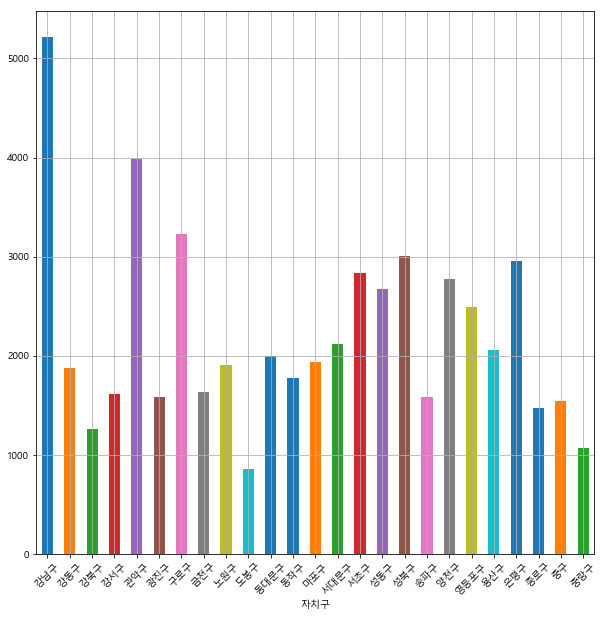

In [109]:
# 소계의 자치구별 바차트 시각화
plt.figure()
#cctv 설치갯수
data_result['소계'].plot( kind='bar', grid=True, figsize=(10,10), rot=45 )  # 차원축소 ( series(시리즈))
plt.show()

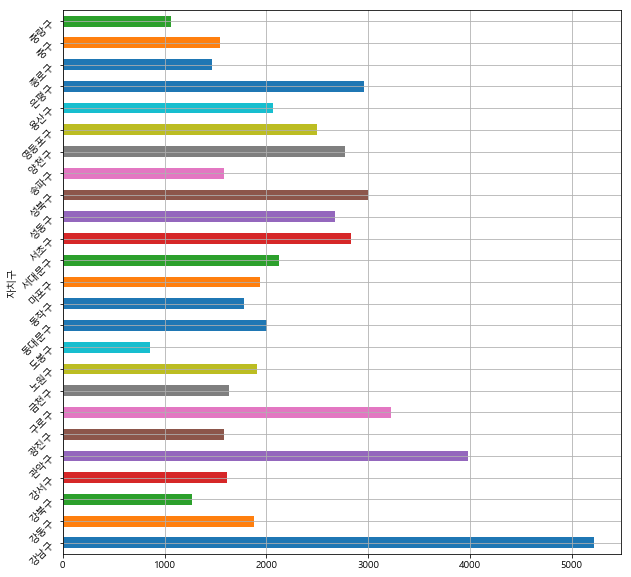

In [87]:
plt.figure()
#cctv 설치갯수
data_result['소계'].plot( kind='barh', grid=True, figsize=(10,10), rot=45 )  # 차원축소 ( series(시리즈))   #barh 로 하면 가로
plt.show()

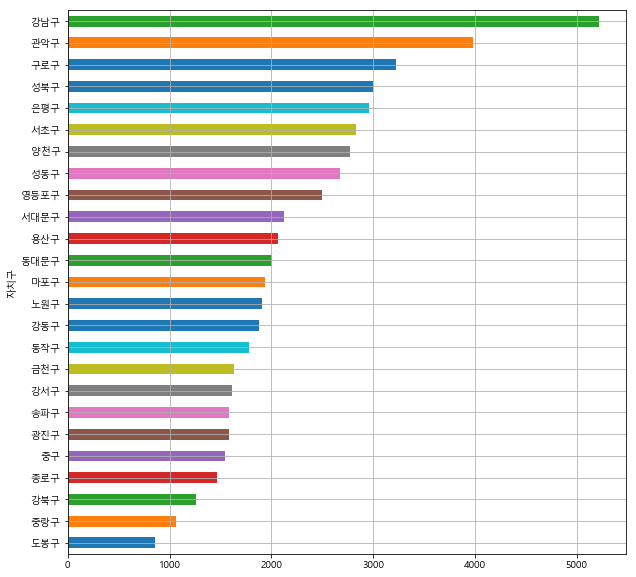

In [88]:
# sort

plt.figure()
#cctv 설치갯수
data_result['소계'].sort_values().plot( kind='barh', grid=True, figsize=(10,10) )  # 차원축소 ( series(시리즈))   #barh 로 하면 가로
plt.show()
# 강남, 관악, 구로구가 상위권을 차지하고, 강남구는 그 중에서 압도적으로 설치 갯수가 많다.
# 도봉구가 최소량의 설치 수를 가지고있다.

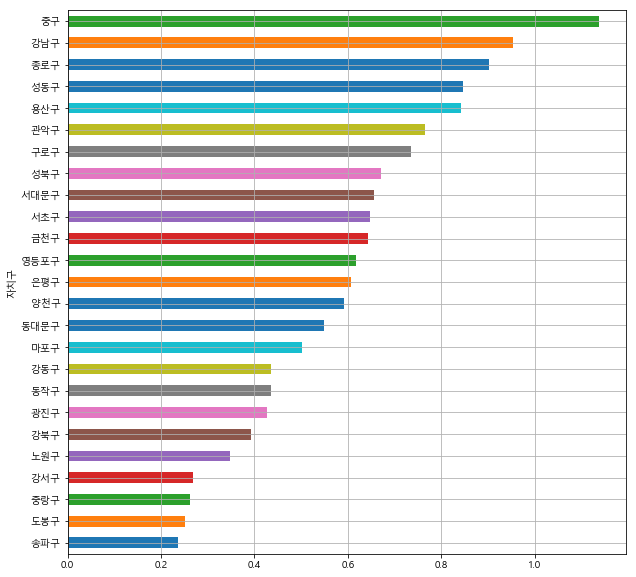

In [89]:
# 인구대비 cctv비율(합친자료)을 계산하여 정렬
# 컬럼명 => CCTV비율 계산 => 정렬 => 시각화(바차트 수평처리)
data_result['CCTV비율'] = (data_result['소계']/data_result['인구수'])*100
data_result['CCTV비율'].sort_values().plot( kind='barh', grid=True, figsize=(10,10) )
plt.show()
# 중구가 인구대비 CCTV 설치율 1위. 중구는 CCTV 설치 갯 수가 낮은 편인데, 주거지가 적고 상업지구나 회사가 많이 위치해 있어서 유동인구가
# 많은 편이라 이런 결과가 나온 것으로 보인다. 그럼에도 불구하고 강남구 2위에 위치해 있어서 설치대수도 많고, 상주인구도 많음을 알 수 있다.
# 도봉구는 여전히 하위권. 송파구가 비율적으로 가장 적다 (인구가 CCTV 대비 더 많다.)

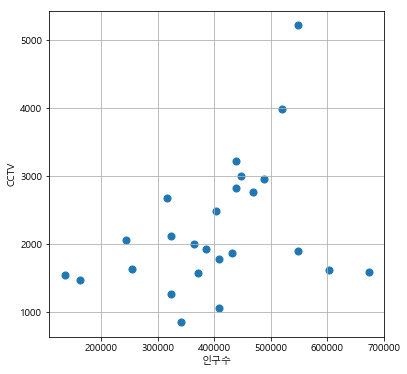

In [90]:
# 산포도, 평균선 작성 ( 어느 곳이 제일 효율적인가를 알 수 있다)
# 인구대비 CCTV 설치 비율이 가장 적절한 자치구는?
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [91]:
# 위의 산포도 기준으로 데이터분포를 설명할 수 있는 기울기가 1인 직선 값을 찾는 방법
# polyfit()
fp1 = np.polyfit( data_result['인구수'], data_result['소계'], 1)
# y= ax+b
# a : 기울기
# b : 절편
fp1 
# [ 기울기, 절편 ]

array([2.85240371e-03, 1.07309855e+03])

In [92]:
# 함수를 구성
f1 = np.poly1d( fp1 ) # poly1d : 기울기, 절편을 넣어서 함수를 생성
type(f1)

numpy.lib.polynomial.poly1d

In [93]:
# x축 데이터
fx = np.linspace( 100000, 700000, 100 )
len(fx) # 100000~700000 사이를 100개로 구간을 나눈다.

100

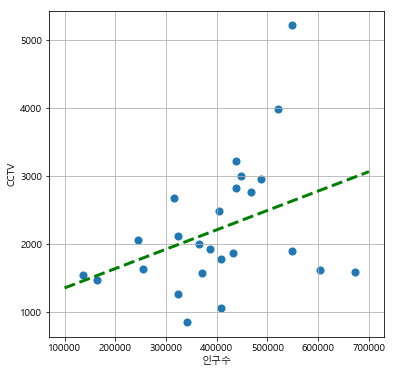

In [94]:
# 산포도
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
# 인구수 대비 cctv 수 직선
plt.plot(fx, f1(fx), ls='dashed', color='g', lw=3)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [95]:
# 직선은 대표값이다.
# 인구수 40만명일 때 적정 CCTV 갯수는 2200대 
tmp = [400000]
f1(tmp)

array([2214.06003236])

In [96]:
# 산포도 포인트에 자치구를 표현(텍스트)
# 대표값 기준으로 포인트들의 거리를 계산해서 멀수록 색상을 진하게 혹은 연하게 처리.
# 색상으로도 설명할 수 있도록 데코레이션 처리


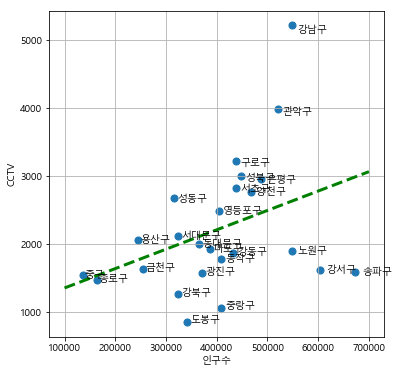

In [97]:
# 산포도
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50) # 포인트를 찍는다.
# 인구수 대비 cctv 수 직선
plt.plot(fx, f1(fx), ls='dashed', color='g', lw=3)  # 평균선
    # 포인트에 자치구 표현
    # 대상선정, 좌표(X1=X*1.02 ,Y1=Y*098 ) => X1은 2% 증가, Y1은 2% 감소
for n in range( data_result.shape[0] ):
    plt.text( data_result['인구수'][n]*1.02,     # X
              data_result['소계'][n]*0.98,       # Y
              data_result.index[n], fontsize=10  # 텍스트
            )
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [98]:
# 거리 계산, 오차,
# 식 = 절대값 | cctv수 - 해당인구수의 평균 cctv수 |
data_result['오차']=np.abs( data_result['소계']- f1( data_result['인구수']))
data_result['오차']

자치구
강남구     2586.344483
강동구      426.108759
강북구      729.182492
강서구     1177.840805
관악구     1428.537426
광진구      550.520026
구로구      903.162358
금천구      163.668991
노원구      730.672166
도봉구     1189.619423
동대문구     109.337611
동작구      460.829841
마포구      240.150393
서대문구     126.346861
서초구      512.083685
성동구      703.221217
성북구      652.917392
송파구     1408.212414
양천구      366.562917
영등포구     270.671314
용산구      290.805827
은평구      497.881144
종로구       67.114515
중구        84.021380
중랑구     1169.298565
Name: 오차, dtype: float64

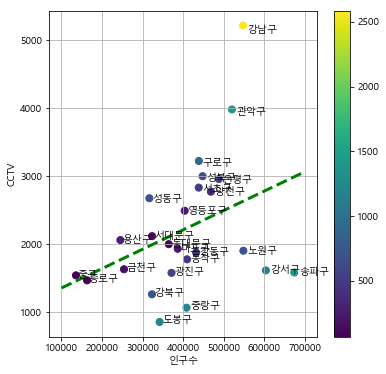

In [99]:
# 산포도
plt.figure(figsize=(6,6))
# 칼라맵 활성화
plt.scatter( data_result['인구수'], data_result['소계'], s=50, c=data_result['오차'] )
plt.plot( fx, f1(fx), ls='dashed', color='g', lw=3 )  # 평균선
    # 포인트에 자치구 표현
    # 대상선정, 좌표(X1=X*1.02 ,Y1=Y*098 ) => X1은 2% 증가, Y1은 2% 감소
# 오차기준 가장 큰 값을 가진 자치구 3개와 작은 값을 가진 자치구 3개를 표현하시오.
for n in range( data_result.shape[0] ):
    plt.text( data_result['인구수'][n]*1.02,   # x
              data_result['소계'][n]*0.98,     # y
              data_result.index[n],fontsize=10 # 텍스트
            )
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
# 칼라바 표현
plt.colorbar()
plt.show()

In [100]:
# 오차기준 가장 큰 값을 가진 자치구 3개와 작은 값을 가진 자치구 3개를 표현하시오.

In [101]:
# 오차 Top3
list(data_result.sort_values(by='오차', ascending=False).index[:3])   #ascending True: 오름차순, False 내림차순

['강남구', '관악구', '송파구']

In [102]:
tmp = data_result.sort_values(by='오차', ascending = False)
target= list(tmp.index[:3]) + list(tmp.index[-3:])
target

['강남구', '관악구', '송파구', '동대문구', '중구', '종로구']

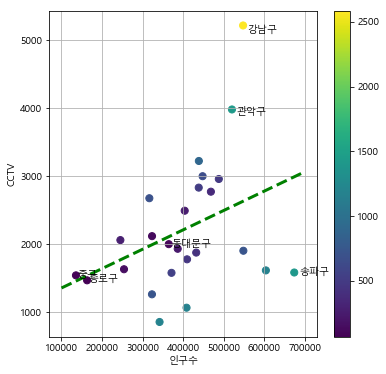

In [103]:
# 산포도
plt.figure(figsize=(6,6))
# 칼라맵 활성화
plt.scatter( data_result['인구수'], data_result['소계'], s=50, c=data_result['오차'] )
plt.plot( fx, f1(fx), ls='dashed', color='g', lw=3 )  # 평균선
    # 포인트에 자치구 표현
    # 대상선정, 좌표(X1=X*1.02 ,Y1=Y*098 ) => X1은 2% 증가, Y1은 2% 감소
# 오차기준 가장 큰 값을 가진 자치구 3개와 작은 값을 가진 자치구 3개를 표현하시오.
for n in range( data_result.shape[0] ):
    # 그리고자 하는 텍스트가 대상 맴버 중에 포함되어 있는가? 리스트 내부에 있는가?
    if data_result.index[n] in target:
        plt.text( data_result['인구수'][n]*1.02,   # x
                  data_result['소계'][n]*0.98,     # y
                  data_result.index[n],fontsize=10 # 텍스트
            )
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
# 칼라바 표현
plt.colorbar()
plt.show()
# 강남구, 관악구, 송파구는 인구대비 CCTV 현황이 현저히 크거나(2개), 작다(1개)
# 이들은 예산 삭감 및 증액등의 기존 예산 검토 후 액션을 취해야한다.
# 중구, 종로구, 동대문구는 아주 효율적으로 CCTV를 증설해 왔다 => 포상개념 XX 지원하다

# ==>  오차기준 가장 큰 값을 가진 자치구 3개와 작은 값을 가진 자치구 3개를 표현하시오.
#        기존의 자치구들은 다 없애고 뽑고자 하는 6개만 뽑음

In [104]:
# 자료 덤프
data_result.to_csv( '../data/populate_per_cctv_analysis_result.csv', sep=',', encoding='utf-8' )